In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/sentiment') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/sentiment'

In [3]:
data_path = ("yelp_labelled_2.csv")
reviews_raw = pd.read_csv(data_path, header=None)
reviews_raw.columns = ['review', 'positive']
reviews_raw.head(100)

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
positive = reviews_raw['positive']
positive_converted = []

for p in positive:
    if p == 1:
        p = 'pos'
        positive_converted.append(p)
    elif p == 0:
        p = 'neg'
        positive_converted.append(p)
reviews_raw['positive_converted'] = positive_converted
reviews_raw.head(10)

,review,positive,positive_converted
0,Wow... Loved this place.,1,pos
1,Crust is not good.,0,neg
2,Not tasty and the texture was just nasty.,0,neg
3,Stopped by during the late May bank holiday of...,1,pos
4,The selection on the menu was great and so wer...,1,pos
5,Now I am getting angry and I want my damn pho.,0,neg
6,Honeslty it didn't taste THAT fresh.),0,neg
7,The potatoes were like rubber and you could te...,0,neg
8,The fries were great too.,1,pos
9,A great touch.,1,pos


In [5]:
keywords = ['love', 'loved', 'awesome', 'incredible', 'wonderful', 'fantastic', 'great', 'friendly', 'delicious', 
            'best']

for key in keywords:
    reviews_raw[str(key)] = reviews_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
reviews_raw.head(10)

,review,positive,positive_converted,love,loved,awesome,incredible,wonderful,fantastic,great,friendly,delicious,best
0,Wow... Loved this place.,1,pos,False,True,False,False,False,False,False,False,False,False
1,Crust is not good.,0,neg,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,neg,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,pos,False,True,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,pos,False,False,False,False,False,False,True,False,False,False
5,Now I am getting angry and I want my damn pho.,0,neg,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,neg,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,neg,False,False,False,False,False,False,False,False,False,False
8,The fries were great too.,1,pos,False,False,False,False,False,False,True,False,False,False
9,A great touch.,1,pos,False,False,False,False,False,False,True,False,False,False


In [7]:
reviews_raw['positive_converted'] = (reviews_raw['positive_converted'] == 'pos')

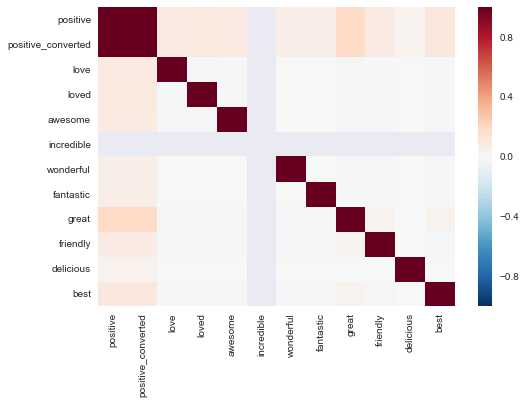

In [8]:
sns.heatmap(reviews_raw.corr())

In [9]:
data = reviews_raw[keywords]
target = reviews_raw['positive_converted']

In [10]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 703 points : 281


In [11]:
data_path_2 = ("amazon.csv")
amazon_raw = pd.read_csv(data_path_2, header=None)
amazon_raw.columns = ['review', 'positive']
amazon_raw.head(100)

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [12]:
positive = amazon_raw['positive']
positive_converted = []

for p in positive:
    if p == 1:
        p = 'pos'
        positive_converted.append(p)
    elif p == 0:
        p = 'neg'
        positive_converted.append(p)
amazon_raw['positive_converted'] = positive_converted
amazon_raw.head(10)

,review,positive,positive_converted
0,So there is no way for me to plug it in here i...,0,neg
1,"Good case, Excellent value.",1,pos
2,Great for the jawbone.,1,pos
3,Tied to charger for conversations lasting more...,0,neg
4,The mic is great.,1,pos
5,I have to jiggle the plug to get it to line up...,0,neg
6,If you have several dozen or several hundred c...,0,neg
7,If you are Razr owner...you must have this!,1,pos
8,"Needless to say, I wasted my money.",0,neg
9,What a waste of money and time!.,0,neg


In [13]:
keywords = ['love', 'loved', 'awesome', 'incredible', 'wonderful', 'fantastic', 'great', 'friendly', 'delicious', 
            'best',]

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

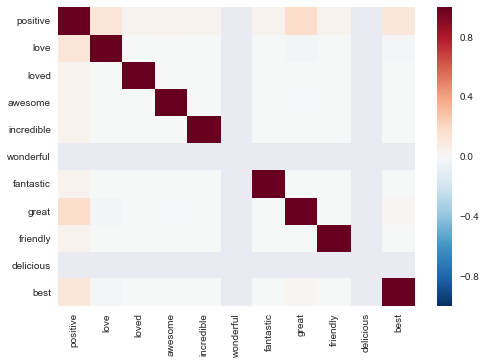

In [14]:
sns.heatmap(amazon_raw.corr())

In [15]:
amazon_raw['positive_converted'] = (amazon_raw['positive_converted'] == 'pos')

In [16]:
data = amazon_raw[keywords]
target = amazon_raw['positive_converted']

In [21]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 433


In [22]:
amazon_raw['positive_converted_neg'] = amazon_raw['positive_converted']

In [23]:
confusion_matrix(target, y_pred)

array([[499,   1],
       [432,  68]])

In [25]:
target.count()

1000

In [29]:
data_training = data[:200]
target_training = target[:200]
data_test = data[200:]
target_test = target[200:]
bnb.fit(data_training, target_training)
y_pred_test = bnb.predict(data_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    len(y_pred_test),
    (target_test != y_pred_test).sum()
))

Number of mislabeled points out of a total 800 points : 353


In [30]:
confusion_matrix(target_test, y_pred_test)

array([[400,   1],
       [352,  47]])

In [46]:
keywords_2 = ['works', 'cool', 'recommend', 'bargain', 'advanced', "must",]
for key in keywords_2:
    amazon_raw[str(key)] = amazon_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon_raw.head(10)

,review,positive,positive_converted,love,loved,awesome,incredible,wonderful,fantastic,great,...,delicious,best,positive_converted_neg,works,cool,recommend,bargain,advanced,must,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


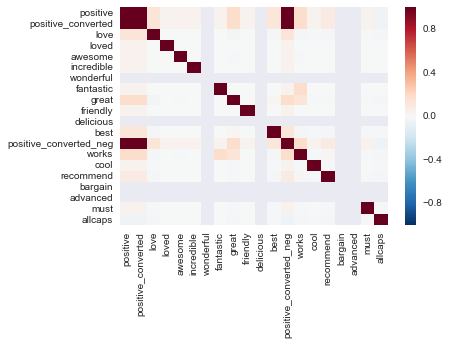

In [47]:
sns.heatmap(amazon_raw.corr())

In [48]:
data = amazon_raw[keywords + keywords_2]
target = amazon_raw['positive_converted']

In [49]:
data_training = data[:200]
target_training = target[:200]
data_test = data[200:]
target_test = target[200:]
bnb.fit(data_training, target_training)
y_pred_test = bnb.predict(data_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    len(y_pred_test),
    (target_test != y_pred_test).sum()
))

Number of mislabeled points out of a total 800 points : 324


In [50]:
confusion_matrix(target_test, y_pred_test)

array([[392,   9],
       [315,  84]])

In [51]:
amazon_raw['allcaps'] = amazon_raw.review.str.isupper()
amazon_raw.head(10)

,review,positive,positive_converted,love,loved,awesome,incredible,wonderful,fantastic,great,...,delicious,best,positive_converted_neg,works,cool,recommend,bargain,advanced,must,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
amazon_raw['allcaps'].describe()

count      1000
unique        2
top       False
freq        985
Name: allcaps, dtype: object

In [62]:
data = amazon_raw[keywords + keywords_2 + ['allcaps']]

In [63]:
target = amazon_raw['positive_converted']

In [64]:
data_training = data[:200]
target_training = target[:200]
data_test = data[200:]
target_test = target[200:]
bnb.fit(data_training, target_training)
y_pred_test = bnb.predict(data_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    len(y_pred_test),
    (target_test != y_pred_test).sum()
))

Number of mislabeled points out of a total 800 points : 324


In [65]:
confusion_matrix(target_test, y_pred_test)

array([[392,   9],
       [315,  84]])

In [73]:
# How to read this
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(target_test, y_pred_test):
     print("%s %s" % (train, test))

[239 244 245 252 261 265 269 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464
 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500
 501 502 503 504 505 506 507 508 509 510 511 512 51

In [76]:
# Why not work?
punct = ['!!!', '...', '?!', '?!?!', '!?!?', "?"]
for p in punct:
    amazon_raw[str(p)] = amazon_raw.review.str.contains(
        str(p),
        case=True
    )


error: nothing to repeat